<a href="https://colab.research.google.com/github/fatemehghassemi/Deeplearning/blob/main/3_3_Stop_Training_Hoda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
!mkdir dataset
!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

--2021-06-24 04:54:04--  https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 929 [text/plain]
Saving to: ‘dataset.py.2’

dataset.py.2        100%[===================>]     929  --.-KB/s    in 0s      

2021-06-24 04:54:04 (42.0 MB/s) - ‘dataset.py.2’ saved [929/929]

mkdir: cannot create directory ‘dataset’: File exists
--2021-06-24 04:54:04--  https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/SR

In [2]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import os
import datetime
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
%load_ext tensorboard

In [3]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
                                                                        training_sample_size=3500,
                                                                        test_sample_size=400,size=28)

In [4]:
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [7]:
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [8]:
x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

In [9]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
                                                                        training_sample_size=3500,
                                                                        test_sample_size=400,size=28)

In [10]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
history= model.fit(x=x_train, 
          y=y_train, 
          validation_split=0.2,
          epochs=10)

Epoch 1/10
88/88 [==============================] - 17s 34ms/step - loss: 1.8379 - accuracy: 0.3472 - val_loss: 0.4124 - val_accuracy: 0.8629
Epoch 2/10
88/88 [==============================] - 2s 28ms/step - loss: 0.5910 - accuracy: 0.8098 - val_loss: 0.2662 - val_accuracy: 0.9043
Epoch 3/10
88/88 [==============================] - 2s 28ms/step - loss: 0.3867 - accuracy: 0.8666 - val_loss: 0.1803 - val_accuracy: 0.9343
Epoch 4/10
88/88 [==============================] - 2s 28ms/step - loss: 0.2833 - accuracy: 0.9136 - val_loss: 0.1417 - val_accuracy: 0.9500
Epoch 5/10
88/88 [==============================] - 3s 28ms/step - loss: 0.1973 - accuracy: 0.9384 - val_loss: 0.1155 - val_accuracy: 0.9600
Epoch 6/10
88/88 [==============================] - 3s 29ms/step - loss: 0.1661 - accuracy: 0.9489 - val_loss: 0.1292 - val_accuracy: 0.9629
Epoch 7/10
88/88 [==============================] - 3s 29ms/step - loss: 0.1294 - accuracy: 0.9575 - val_loss: 0.0937 - val_accuracy: 0.9671
Epoch 8/10
8

In [13]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

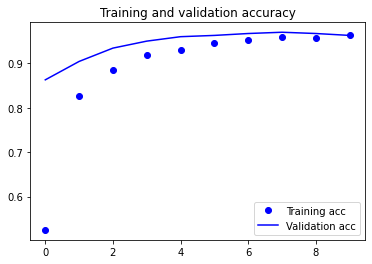

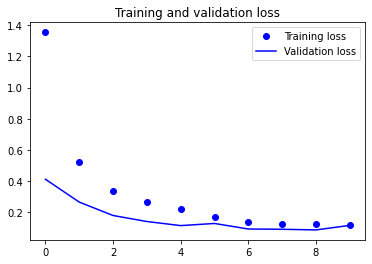

In [14]:
import matplotlib.pyplot as plt
plot_history(history)

In [15]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.7):
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True
            
callbacks = myCallback()

In [16]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
history2= model.fit(x=x_train, 
          y=y_train, 
          validation_split=0.2,
          epochs=10,
          callbacks=[callbacks])

Epoch 1/10
88/88 [==============================] - 4s 32ms/step - loss: 1.8058 - accuracy: 0.3729 - val_loss: 0.4251 - val_accuracy: 0.8514
Epoch 2/10
88/88 [==============================] - 2s 28ms/step - loss: 0.5713 - accuracy: 0.8034 - val_loss: 0.2745 - val_accuracy: 0.9086

Reached 60% accuracy so cancelling training!


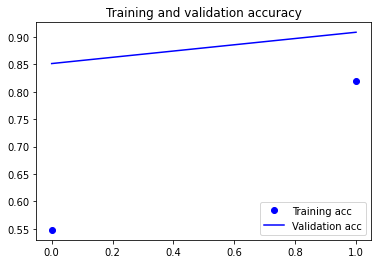

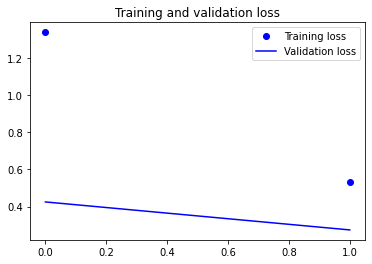

In [19]:
plot_history(history2)